### Name: Shubhma Chemate
### Roll Number: 31118
### Assignment - 04

In [31]:
import numpy as np 
import pandas as pd

In [32]:
# import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [33]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


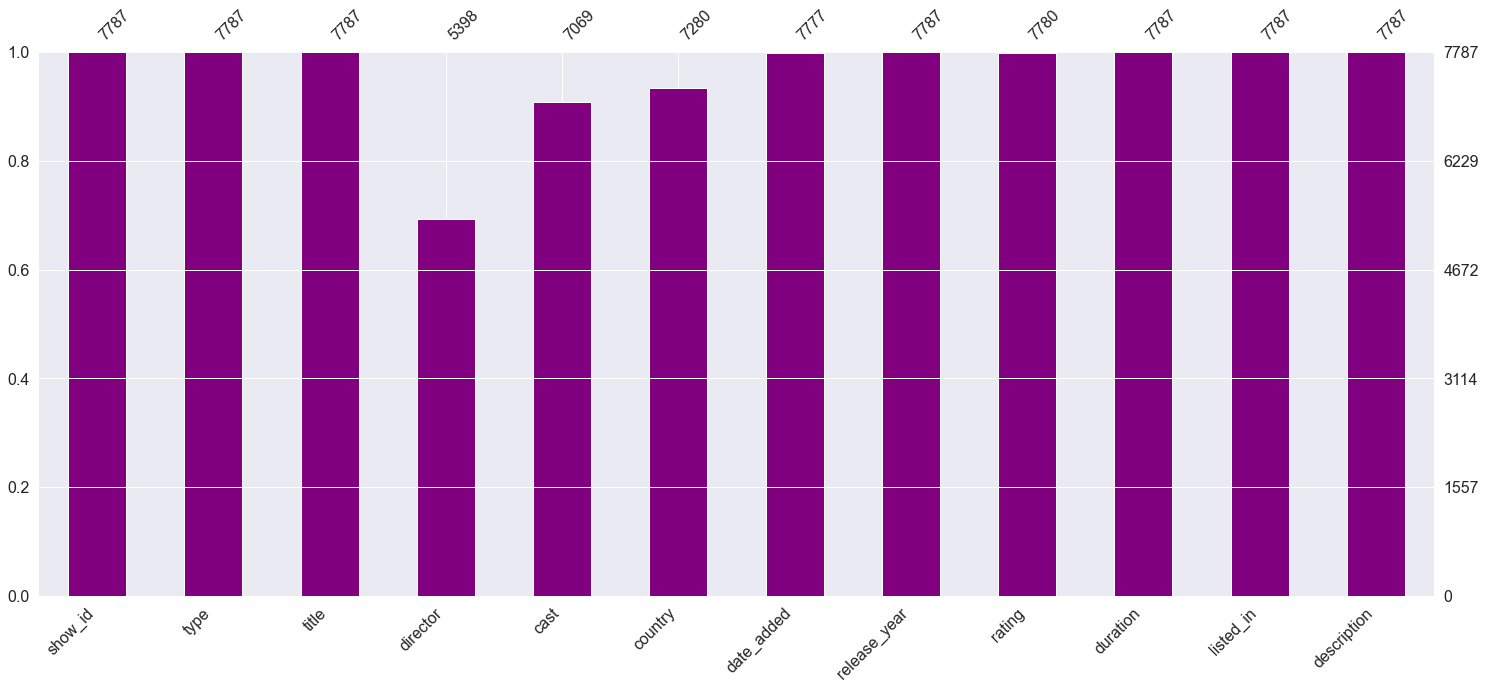

In [35]:
n = msno.bar(df,color='purple')


In [36]:
df.drop(["director","cast"],axis =1,inplace=True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [37]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [38]:
df['country'].replace(np.nan,"United States",inplace=True)
df['country'].value_counts()

United States                                                   3062
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [39]:
df['date_added'].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [40]:
netflix_date = df[['date_added']].replace(np.nan,'Not Added')
netflix_date["release_month"] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix_date.head()

,date_added,release_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [41]:
netflix_date["release_month"].value_counts()

December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Not           10
Name: release_month, dtype: int64

In [42]:
netflix_date['release_month'].replace('Not', 0,inplace=True)

In [43]:
netflix_date["release_month"].value_counts()

December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
0             10
Name: release_month, dtype: int64

In [44]:
netflix_date.drop("date_added",axis=1,inplace=True)
netflix_date.head()

,release_month
0,August
1,December
2,December
3,November
4,January


In [45]:
netflix = pd.concat([df,netflix_date],axis=1)
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


In [46]:
netflix.drop("date_added",axis=1,inplace=True)
netflix.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


In [47]:
netflix["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [48]:
netflix["rating"].isnull().sum()

7

In [49]:
netflix["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

In [50]:
netflix.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


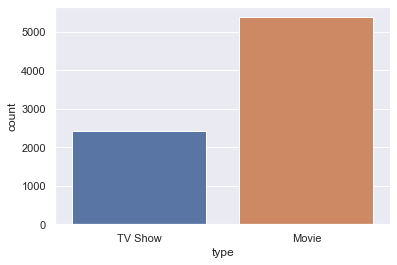

In [51]:
sns.set()
sns.countplot(x="type",data=netflix)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

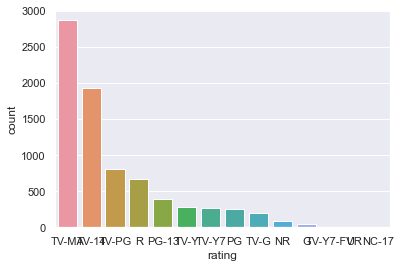

In [52]:
# plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=netflix,order= netflix['rating'].value_counts().index[0:14])

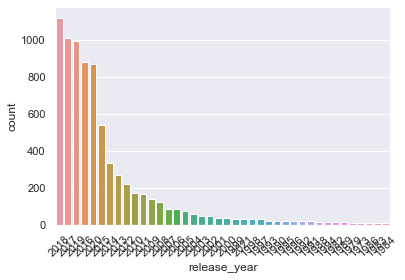

In [53]:
sns.set()
# plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= netflix,order = netflix['release_year'].value_counts().index[0:40])
plt.xticks(rotation=45)
plt.show()

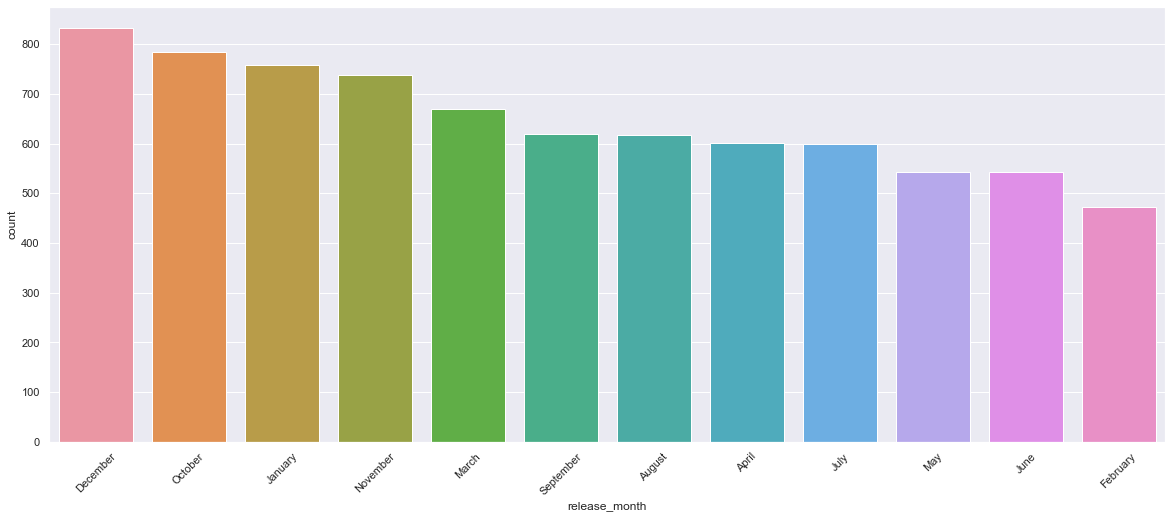

In [54]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= netflix,order = netflix['release_month'].value_counts().index[0:12])
plt.xticks(rotation=45)
plt.show()

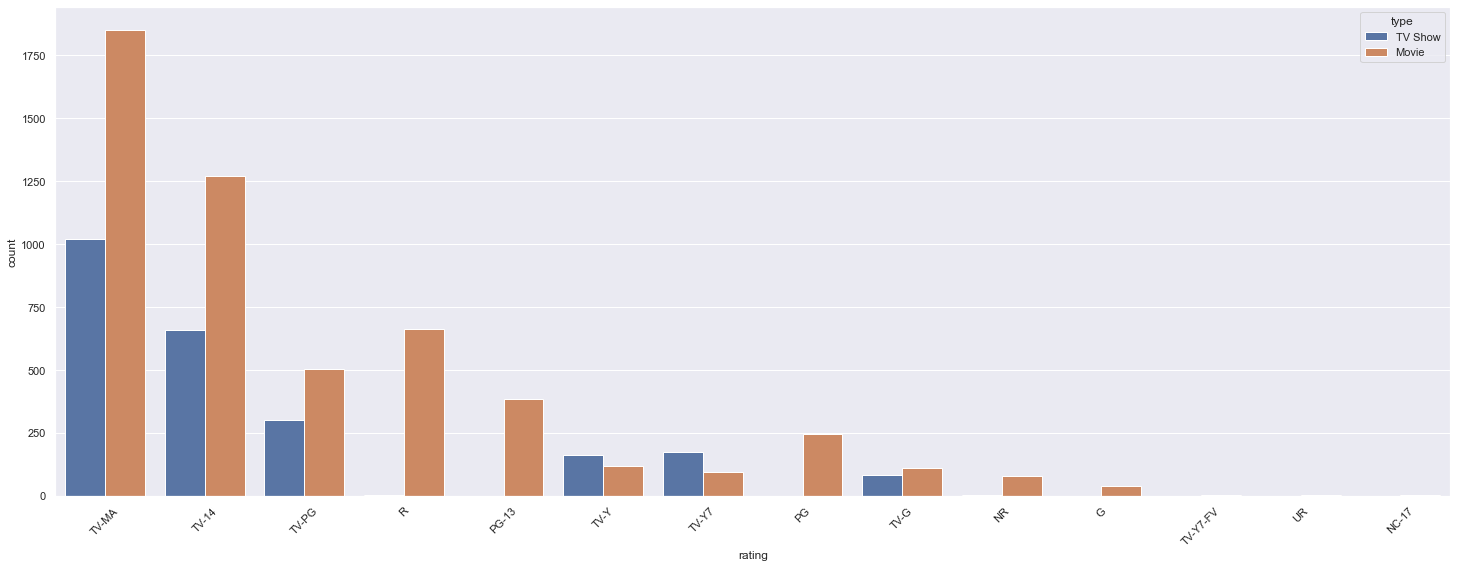

In [55]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= netflix,hue= "type",order = netflix['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

In [56]:
netflix["country"].value_counts().head()

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

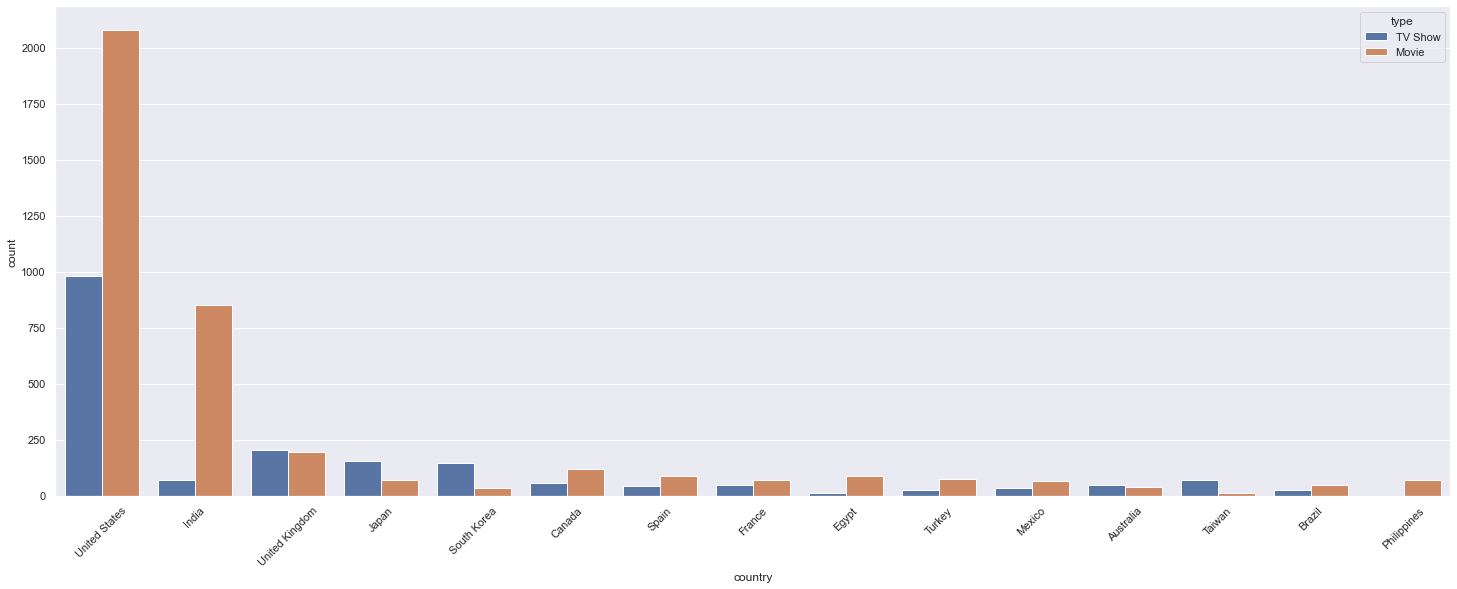

In [57]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix,hue= "type",order = netflix['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

In [58]:
top = netflix['country'].value_counts()[0:8]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France'],
      dtype='object')

In [59]:
fig = px.pie(netflix,values = top,names = top.index,labels= top.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

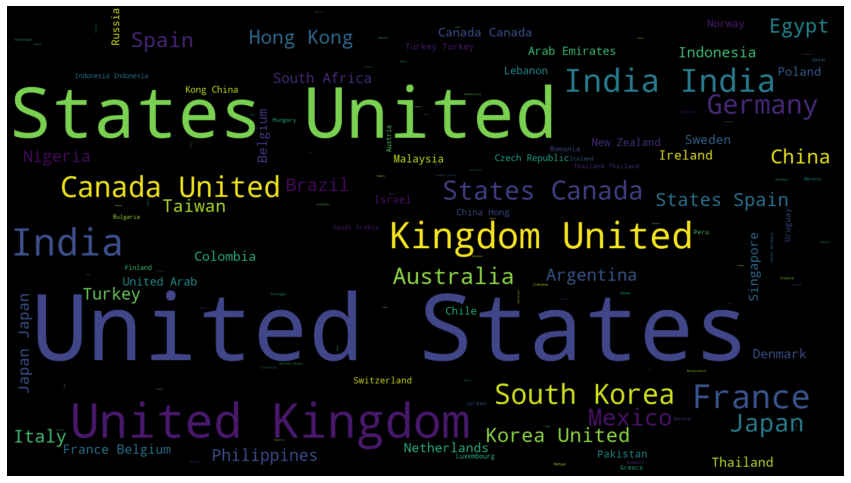

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(netflix.country))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

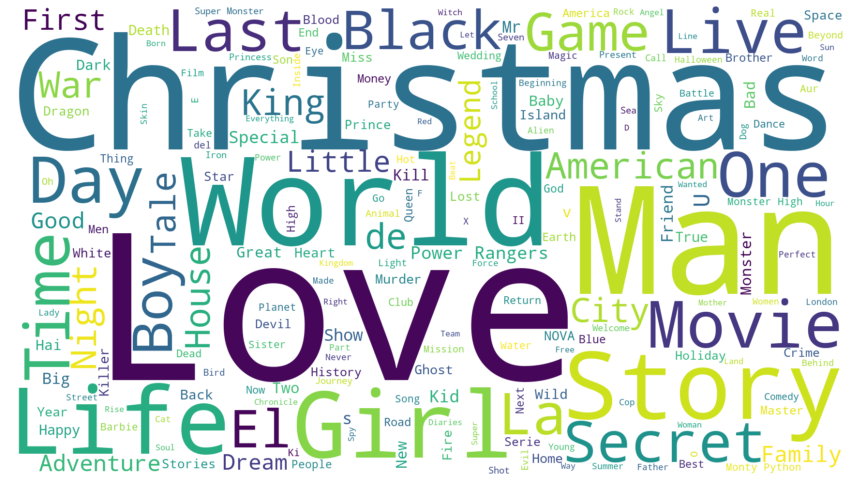

In [61]:
wordcloud = WordCloud(background_color = "white",width=1730,height=970).generate(" ".join(netflix.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

In [62]:
top_listed_in=netflix["listed_in"].value_counts()[0:25]
top_listed_in.head()

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Name: listed_in, dtype: int64

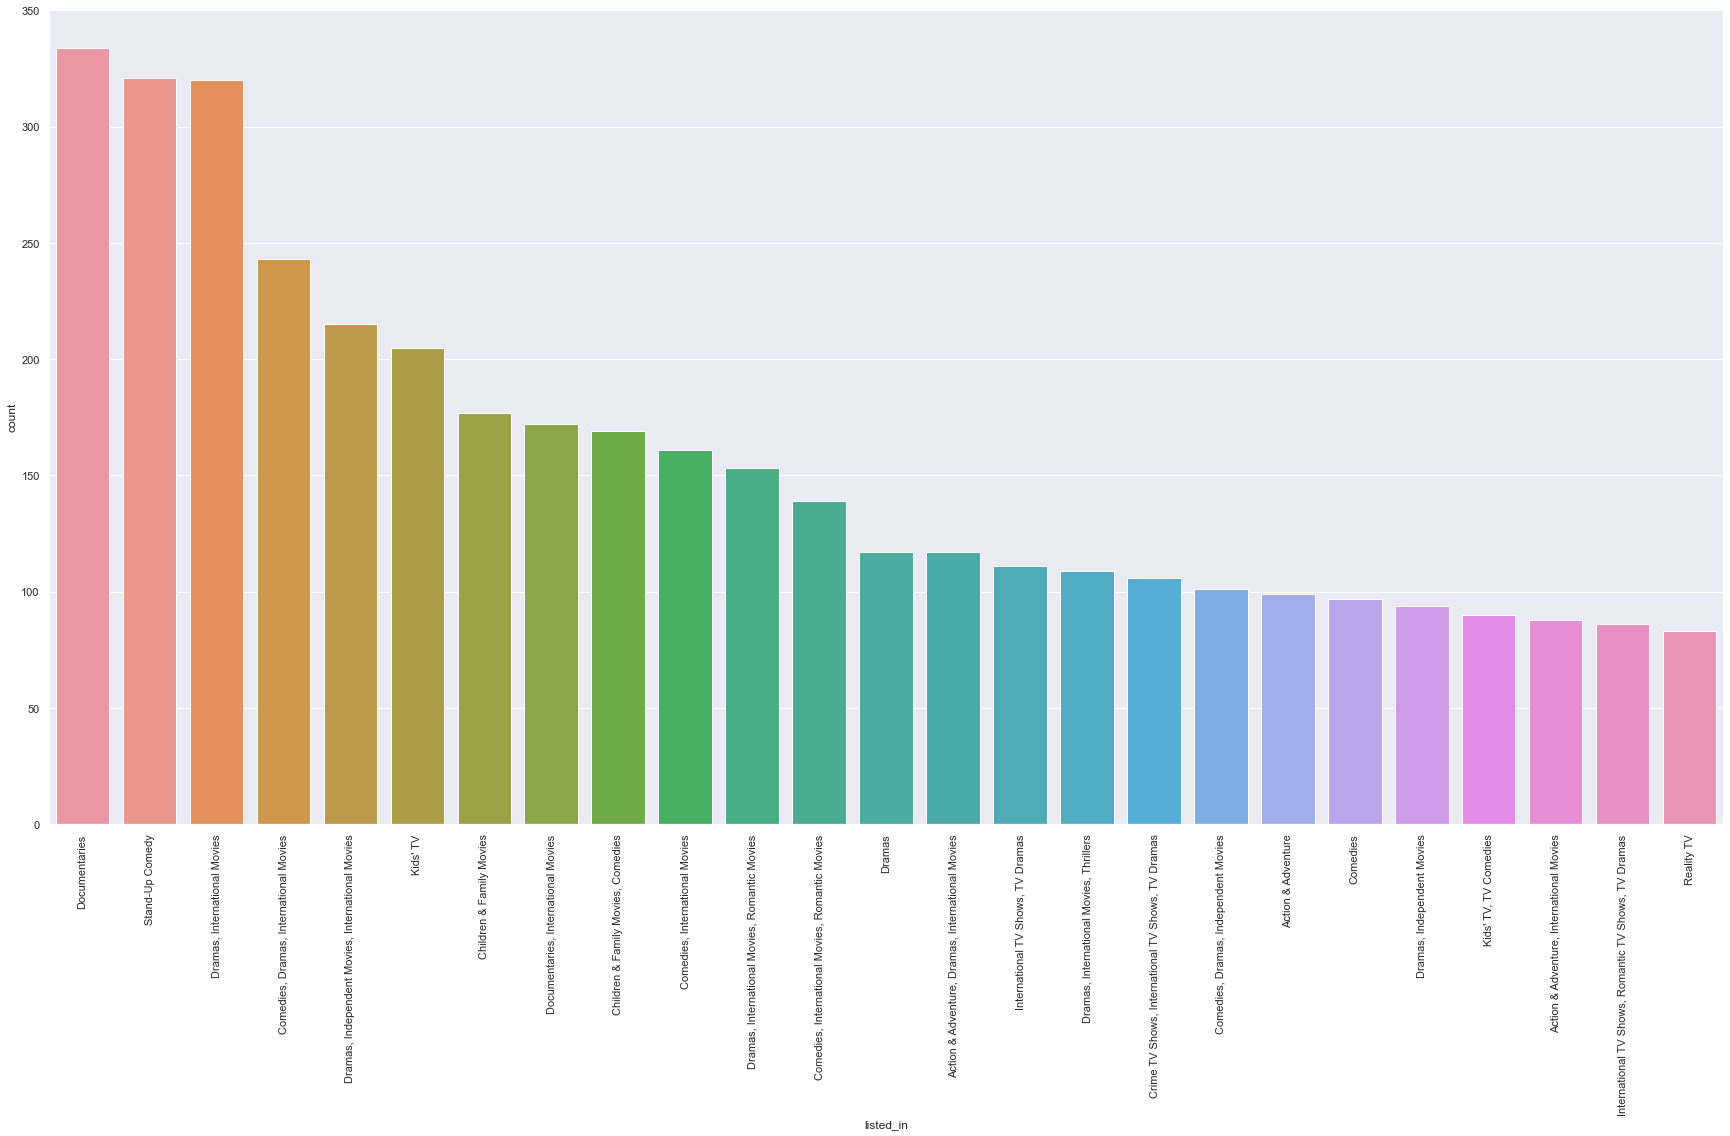

In [63]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',data = netflix,order =netflix["listed_in"].value_counts().index[0:25])
plt.xticks(rotation = 90)
plt.show()

In [64]:
fig = px.pie(netflix,values = top_listed_in,names = top_listed_in.index,labels= top_listed_in.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

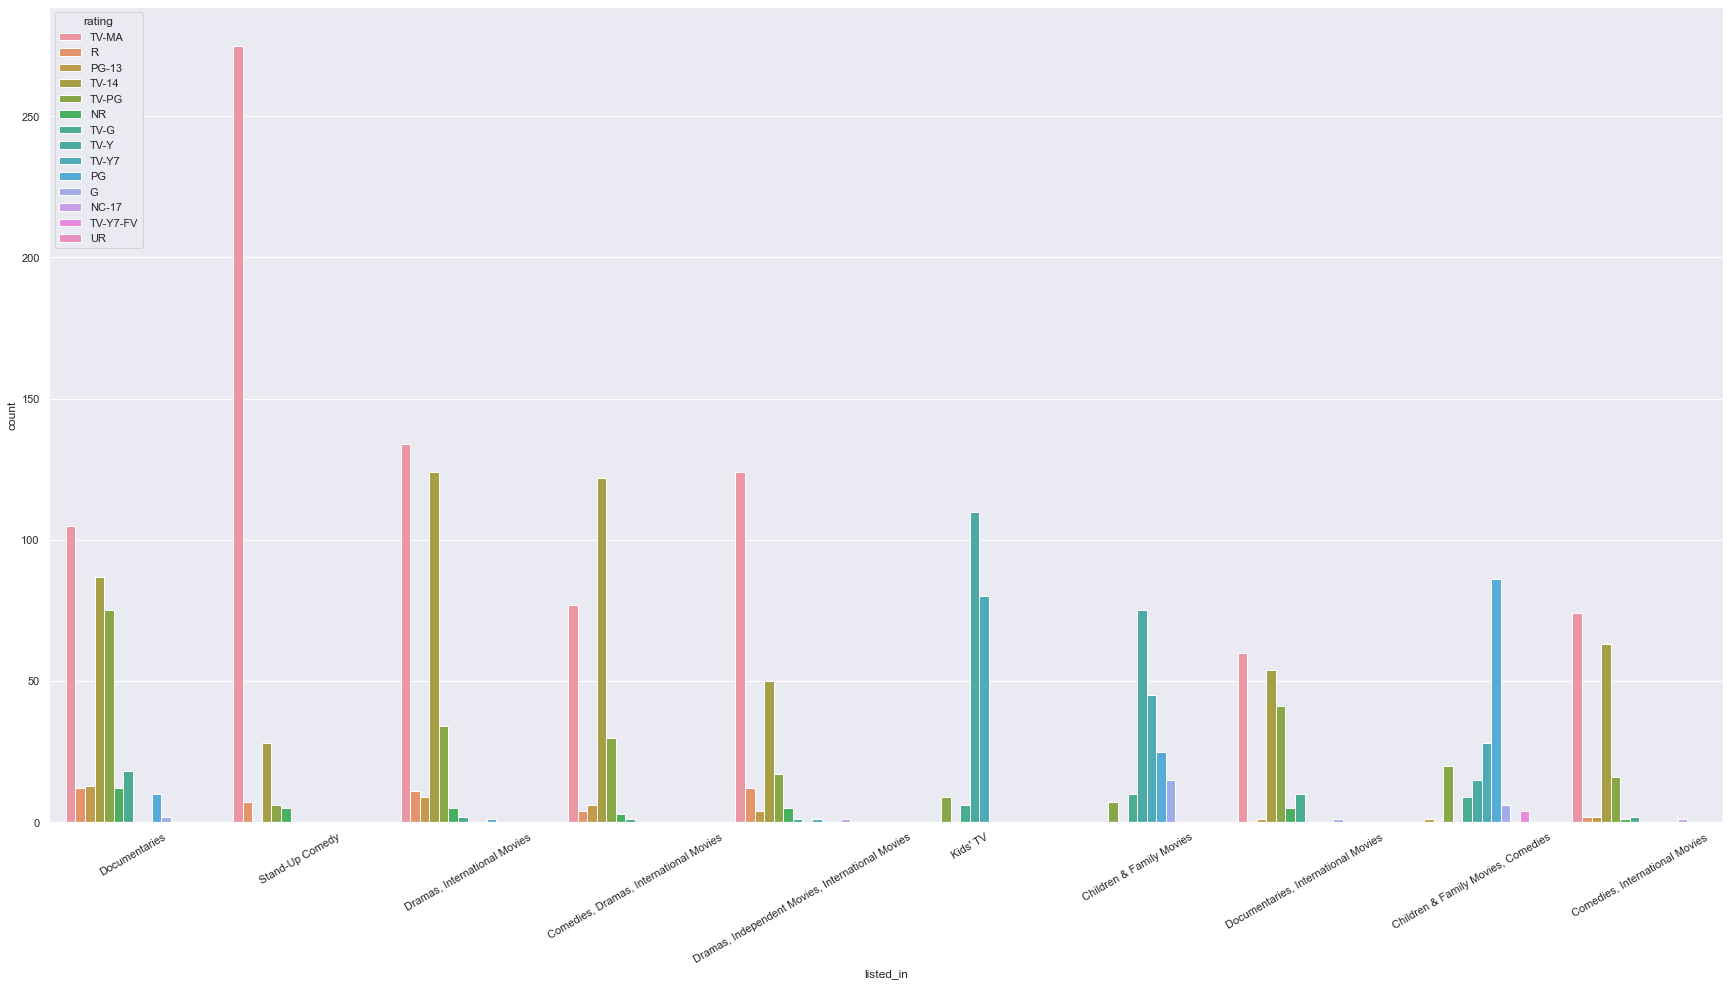

In [65]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',hue='rating',data = netflix,order =netflix["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

In [66]:
old = netflix.sort_values("release_year",ascending=True)
old[["title","type","country","release_year"]].head(20)

,title,type,country,release_year
4867,Pioneers: First Women Filmmakers*,TV Show,United States,1925
6117,The Battle of Midway,Movie,United States,1942
4960,Prelude to War,Movie,United States,1942
7679,WWII: Report from the Aleutians,Movie,United States,1943
7342,Undercover: How to Operate Behind Enemy Lines,Movie,United States,1943
7616,Why We Fight: The Battle of Russia,Movie,United States,1943
7268,Tunisian Victory,Movie,"United States, United Kingdom",1944
6699,The Negro Soldier,Movie,United States,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,Movie,United States,1944
5371,San Pietro,Movie,United States,1945


In [67]:
kids_show=netflix[netflix["listed_in"] == "Kids' TV"].reset_index()
kids_show[["title","country","release_year"]].head(10)

,title,country,release_year
0,44 Cats,Italy,2018
1,Abby Hatcher,"United States, Canada",2019
2,Alphablocks,United Kingdom,2014
3,Ask the StoryBots,United States,2019
4,Bal Ganesh,United States,2019
5,Barbie Dreamhouse Adventures,"United States, Canada",2018
6,Barbie Dreamhouse Adventures: Go Team Roberts,United States,2020
7,Bat Pat,Italy,2016
8,Be-Be-Bears,Russia,2018
9,Beat Bugs,"Australia, Canada",2018


In [68]:
netflix[netflix["country"] == "India"]

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
8,s9,Movie,706,India,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",April
9,s10,Movie,1920,India,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December
18,s19,Movie,15-Aug,India,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",March
20,s21,Movie,​​Kuch Bheege Alfaaz,India,2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,September
21,s22,Movie,​Goli Soda 2,India,2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",September
...,...,...,...,...,...,...,...,...,...,...
7764,s7765,Movie,Zero,India,2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,May
7769,s7770,Movie,Zindagi Na Milegi Dobara,India,2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,December
7776,s7777,Movie,Zokkomon,India,2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",November
7780,s7781,Movie,Zoo,India,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,July


In [69]:
Country = pd.DataFrame(netflix["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

,country,TotalShows
0,United States,3062
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183


In [70]:
fig = px.choropleth(   
    locationmode='country names',
    locations=Country.country,
    featureidkey="Country.country",
    labels=Country["TotalShows"]
)
fig.show()